<a href="https://colab.research.google.com/github/dantae74/machine-learning/blob/main/06-01-softmax-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모두를 위한 머신러닝에서 가져왔습니다.

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
x_raw = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_raw = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

In [3]:
x_data = np.array(x_raw, dtype=np.float32)
y_data = np.array(y_raw, dtype=np.float32)

nb_classes = 3

In [4]:
tf.model = tf.keras.Sequential()

In [5]:
tf.model.add(tf.keras.layers.Dense(units=nb_classes, input_dim=4, use_bias=True)) # use_bias is True, by default

In [6]:
# use softmax activations: softmax = exp(logits) / reduce_sum(exp(logits), dim)
tf.model.add(tf.keras.layers.Activation('softmax'))

In [7]:
# use loss == categorical_crossentropy
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


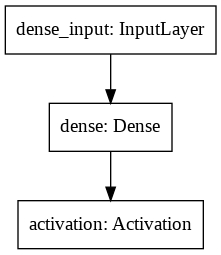

In [8]:
tf.keras.utils.plot_model(tf.model)

In [9]:
history = tf.model.fit(x_data, y_data, epochs=2000, verbose=0)

In [10]:
print('--------------')
# Testing & One-hot encoding
a = tf.model.predict(np.array([[1, 11, 7, 9]]))
print(a, tf.keras.backend.eval(tf.argmax(a, axis=1)))

--------------
[[6.8053738e-03 9.9318451e-01 1.0177581e-05]] [1]


In [11]:
print('--------------')
b = tf.model.predict(np.array([[1, 3, 4, 3]]))
print(b, tf.keras.backend.eval(tf.argmax(b, axis=1)))

--------------
[[0.8394477  0.14431101 0.01624132]] [0]


In [12]:
print('--------------')
# or use argmax embedded method, predict_classes
c = tf.model.predict(np.array([[1, 1, 0, 1]]))
c_onehot = tf.model.predict_classes(np.array([[1, 1, 0, 1]]))
print(c, c_onehot)

--------------
[[1.5563808e-08 3.7034560e-04 9.9962962e-01]] [2]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [14]:
print('--------------')
all = tf.model.predict(np.array([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]))
# all_onehot = tf.model.predict_classes(np.array([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]))
# print(all, all_onehot)
print(all, np.argmax(all, axis=-1))

--------------
[[6.8053608e-03 9.9318451e-01 1.0177601e-05]
 [8.3944768e-01 1.4431104e-01 1.6241303e-02]
 [1.5563808e-08 3.7034563e-04 9.9962962e-01]] [1 0 2]
